### Data exploratory analysis

### Summary

 - Methane yield is not normally distributed (Shapiro-Wilk normality test p-value = 0,0405)

**Pretreatment:**

- There is no basis to reject the hypothesis that pretreated and not pretreated do not differ significantly (KS p-value = 0,1184)
- T-test for mean values does not show significant differences in mean values (samples can be considered as large) p-value = 0,09838
- If the "food waste" outlier is removed then the T-test results in significant outcome (p-value = 0,005393). 
- ANOVA does not indicate the influence of the pretreatment to Methane yield (p-value = 0,434) \[the data is sparse, and not well balanced, the outcome is not robust\]

**Co-substrate**

 - There is no basis to reject the hypothesis that with and without the co-substrate do not differ significantly (KS p-value = 0,2404)
 
 - The T-test does not show significant differences between with and without cosubstrate (p-value = 0,2257)
 - ANOVA performed for co-substrates with count above 2 (including None == no co-substrate) does not show significant influence (p-value = 0,0859). The outcome may be biased due to unbalanced set, and clearly category None is very spread.
 - However ANOVA gives significant outcomes, when None cateogory is excluded (p-value = 5,68e-05). Only categories with count above 2 were included \['Corn stover', 'Manure', 'pretreated meadow grass silage', 'Wheat straw'\]
  
**Conclusion**  

There are no clear differences between the methane yield distribution in groups with or without co-substrates and pretreated or not pretreated. The dataset is quite small and very sparse in terms of comparing variables *Co-substrate*, *pretreatment*, and *Substrate*. Taking into consideration the fact, that possibly the most influencial factor is *Substrate* (ANOVA p-value = 0,0248) the analysis is not very robust in terms of analysis of the other factors. In order to obtain certain outcomes improved dataset would be required (I know it is not viable). What can be stated:

 - Methane yield is significantly influenced by the *Substrate*
 - Methane yield is significantly influenced by the *Co-substrate* in the group with co-substrate added
 - There are no significant differences between distribution of samples collected from pretreated and not pretreated populations
 - There are no significant differences between distribution of samples collected from with and without co-substrate
 
 Taking into account the fact, all the data was collected, the metaanalysis should be based on the expert knowledge. Due to the abovementioned glitches of the dataset, it is rather unlikely that statistics will provide much support to the research. Exception is the exploratory data visualization.


In [134]:
library(openxlsx)
library(ggplot2)
library(tidyverse)

In [168]:
df <- read.xlsx('Biogas _new_17.09.2019.xlsx',sheet = 2)
nrow(df)
df$pretreated <- ifelse(df$Pretreatment.g == "None",FALSE,TRUE)
df$cosubstrated <- ifelse(df$`Co-substrate` == "None",FALSE,TRUE)
df$pretreatment_type <- as.factor(df$Pretreatment.g)
df$Pretreatment.g <- NULL
head(df)

[1] 104

Pretreatment,Substrate,Co-substrate,Methane.yield,pretreated,cosubstrated,pretreatment_type
Mechanical,meadow grass silage,None,353,TRUE,FALSE,Mechanical
Mechanical,meadow grass silage,None,359,TRUE,FALSE,Mechanical
Biological,Activated sludge,None,234,TRUE,FALSE,Biological
Biological,Activated sludge,None,279,TRUE,FALSE,Biological
Biological,Activated sludge,None,571,TRUE,FALSE,Biological
Thermo-chemical,Activated sludge,None,520,TRUE,FALSE,Chemical


### Normality testing and histograms

In [107]:
shapiro.test(df$Methane.yield)


	Shapiro-Wilk normality test

data:  df$Methane.yield
W = 0,9743, p-value = 0,0405


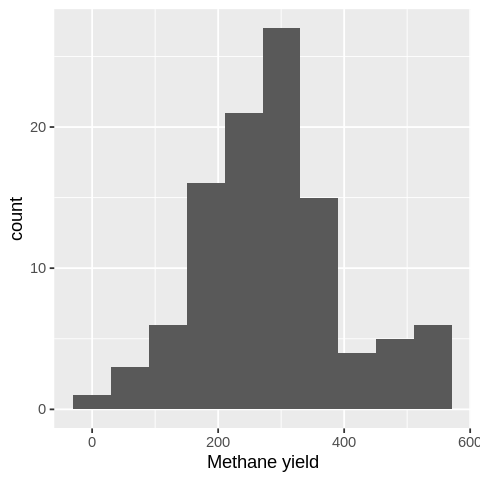

In [83]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield)) + geom_histogram(bins = round(sqrt(nrow(df)))) + xlab("Methane yield")

### Exploring the influence of the pretreatment

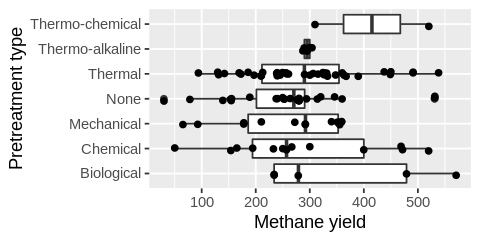

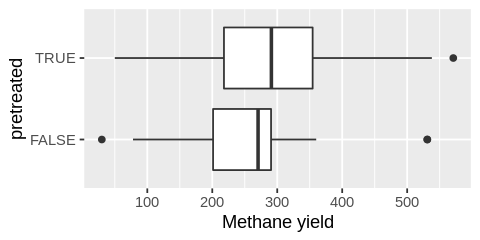

In [122]:
options(repr.plot.width = 4, repr.plot.height = 2)

ggplot(data=df, aes(x = pretreatment_type, y = Methane.yield)) + geom_boxplot() + coord_flip() + geom_jitter(width = 0.1) + ylab("Methane yield") + xlab("Pretreatment type")

ggplot(data=df, aes(x = pretreated, y = df$Methane.yield)) + geom_boxplot() + coord_flip() + ylab("Methane yield")

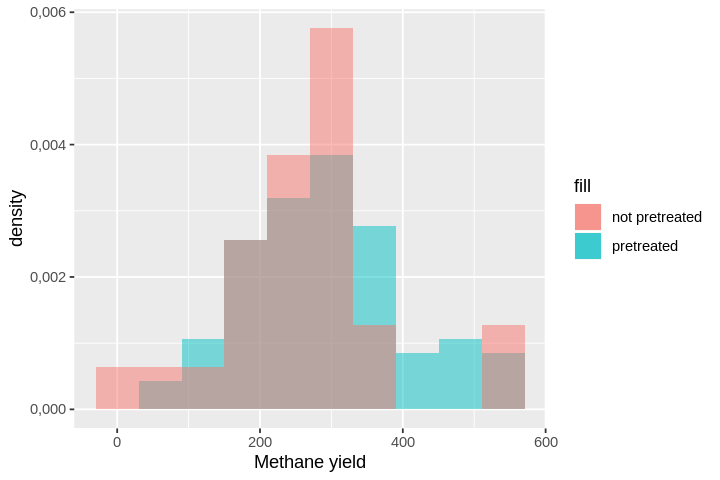

In [118]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot() + geom_histogram(alpha = 0.5, aes(df[df$pretreated == TRUE,]$Methane.yield, y = ..density.., fill = "pretreated"), bins = 10) + geom_histogram(alpha = 0.5, aes(df[df$pretreated == FALSE,]$Methane.yield, y = ..density.., fill = "not pretreated"), bins = 10) + xlab("Methane yield")

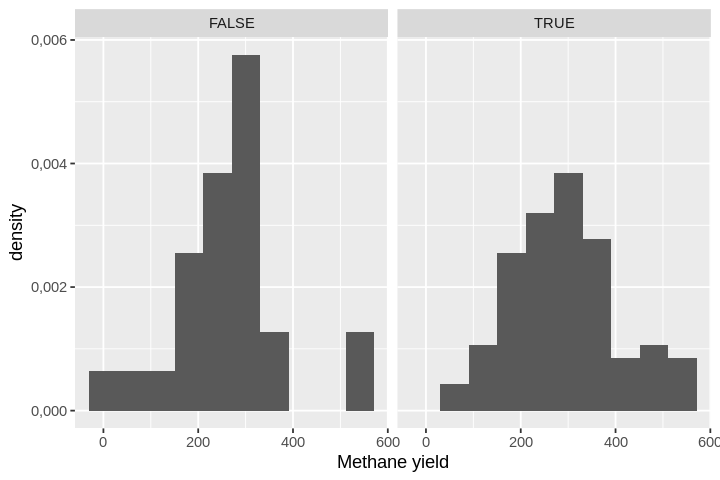

In [120]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield, y = ..density..)) + geom_histogram(bins = 10) + facet_wrap( pretreated ~ .) + xlab("Methane yield")

In [121]:
ks.test(df[df$pretreated == TRUE,]$Methane.yield,df[df$pretreated == FALSE,]$Methane.yield)

Warning message in ks.test(df[df$pretreated == TRUE, ]$Methane.yield, df[df$pretreated == :
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  df[df$pretreated == TRUE, ]$Methane.yield and df[df$pretreated == FALSE, ]$Methane.yield
D = 0,26923, p-value = 0,1184
alternative hypothesis: two-sided


In [87]:
X <- df[df$pretreated == FALSE,"Methane.yield"]
Y <- df[df$pretreated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -1,3109, df = 43,524, p-value = 0,09838
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 9,430207
sample estimates:
mean of x mean of y 
 260,2692  293,7051 


**However if the outlier is removed, the difference is significant**

In [88]:
X <- df[df$pretreated == FALSE & df$Substrate != "Food waste","Methane.yield"]
Y <- df[df$pretreated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -2,6434, df = 52,733, p-value = 0,005393
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf -20,5292
sample estimates:
mean of x mean of y 
 237,7083  293,7051 


In [129]:
pretreated_anova <- aov(Methane.yield ~ pretreatment_type, data = df[df$pretreated == TRUE,c("pretreatment_type","Methane.yield")])
summary(pretreated_anova)

                  Df Sum Sq Mean Sq F value Pr(>F)
pretreatment_type  5  64044   12809   0,984  0,434
Residuals         72 937440   13020               

In [132]:
pretreated_notpretreated_anova <- aov(Methane.yield ~ pretreatment_type, data = df[,c("pretreatment_type","Methane.yield")])
summary(pretreated_notpretreated_anova)

                  Df  Sum Sq Mean Sq F value Pr(>F)
pretreatment_type  6   85844   14307   1,109  0,363
Residuals         97 1251917   12906               

### Exploring the influence of the co-substrate

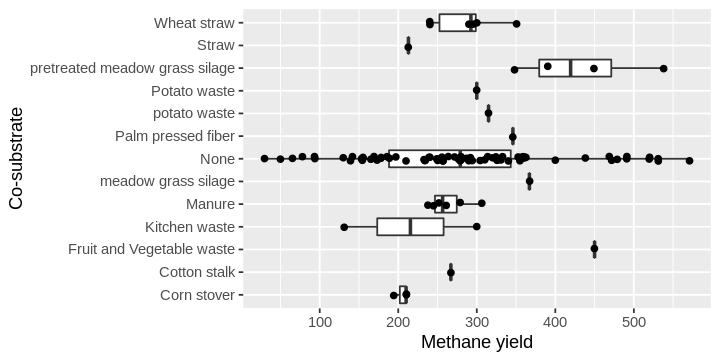

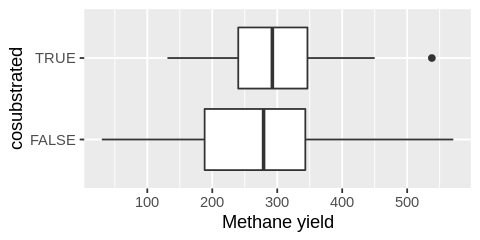

In [124]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(data=df, aes(x = `Co-substrate`, y = Methane.yield)) + geom_boxplot() + coord_flip() + geom_jitter(width = 0.1) + ylab("Methane yield") + xlab("Co-substrate")
options(repr.plot.width = 4, repr.plot.height = 2)
ggplot(data=df, aes(x = cosubstrated, y = df$Methane.yield)) + geom_boxplot() + coord_flip() + ylab("Methane yield")

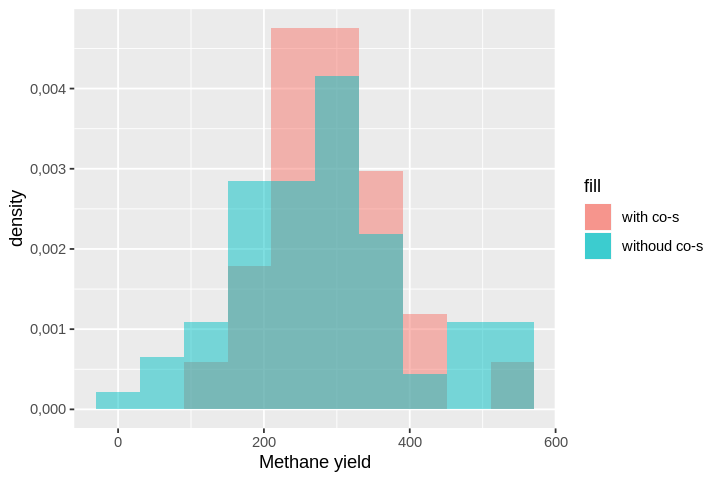

In [125]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot() + geom_histogram(alpha = 0.5, aes(df[df$cosubstrated == TRUE,]$Methane.yield, y = ..density.., fill = "with co-s"), bins = 10) + geom_histogram(alpha = 0.5, aes(df[df$cosubstrated == FALSE,]$Methane.yield, y = ..density.., fill = "withoud co-s"), bins = 10) + xlab("Methane yield")

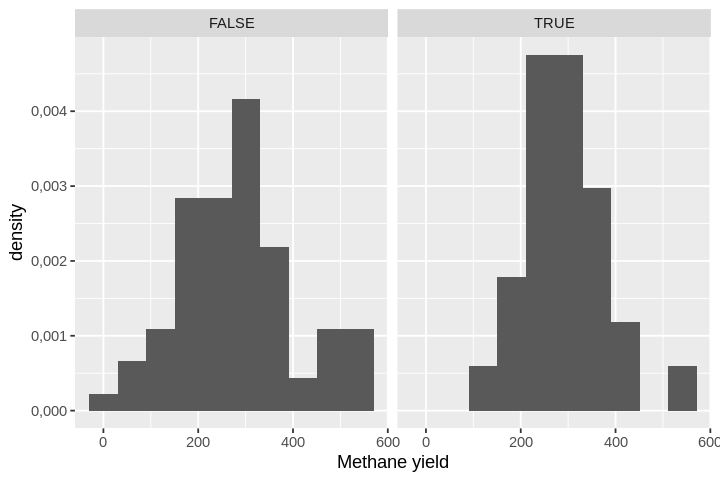

In [126]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield, y = ..density..)) + geom_histogram(bins = 10) + facet_wrap( cosubstrated ~ .) + xlab("Methane yield")

In [128]:
ks.test(df[df$cosubstrated == TRUE,]$Methane.yield,df[df$cosubstrated == FALSE,]$Methane.yield)

Warning message in ks.test(df[df$cosubstrated == TRUE, ]$Methane.yield, df[df$cosubstrated == :
“cannot compute exact p-value with ties”


	Two-sample Kolmogorov-Smirnov test

data:  df[df$cosubstrated == TRUE, ]$Methane.yield and df[df$cosubstrated == FALSE, ]$Methane.yield
D = 0,22744, p-value = 0,2404
alternative hypothesis: two-sided


In [131]:
X <- df[df$cosubstrated == FALSE,"Methane.yield"]
Y <- df[df$cosubstrated == TRUE,"Methane.yield"]
t.test(X, Y,alternative =  "less")


	Welch Two Sample t-test

data:  X and Y
t = -0,75755, df = 67,946, p-value = 0,2257
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 19,68566
sample estimates:
mean of x mean of y 
 280,9342  297,3214 


**Testing ANOVA**

In [171]:
cs_df <- df %>% group_by(`Co-substrate`) %>% summarise(n=n()) %>% filter(n>2)
cs_df

Co-substrate,n
Corn stover,3
Manure,6
None,76
pretreated meadow grass silage,4
Wheat straw,6


In [164]:
cosubs_none <- cs_df$`Co-substrate`
cosubs_none

cosubstrated_anova <- aov(Methane.yield ~ `Co-substrate`, data = filter(df, `Co-substrate` %in% cosubs_none))
summary(cosubstrated_anova) # that is biased by the unbalanced dataset n(None) >> n(others)

[1] "Corn stover"                    "Manure"                        
[3] "None"                           "pretreated meadow grass silage"
[5] "Wheat straw"

               Df  Sum Sq Mean Sq F value Pr(>F)  
`Co-substrate`  4  108871   27218   2,111 0,0859 .
Residuals      90 1160578   12895                 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

In [165]:
cosubs <- cs_df[cs_df$`Co-substrate` != 'None',]$`Co-substrate`
cosubs

cosubstrated_anova1 <- aov(Methane.yield ~ `Co-substrate`, data = filter(df, `Co-substrate` %in% cosubs))
summary(cosubstrated_anova1)

[1] "Corn stover"                    "Manure"                        
[3] "pretreated meadow grass silage" "Wheat straw"

               Df Sum Sq Mean Sq F value   Pr(>F)    
`Co-substrate`  3 105126   35042    16,2 5,68e-05 ***
Residuals      15  32441    2163                     
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Not enough data to cross-compare cosubstrated and pretreated

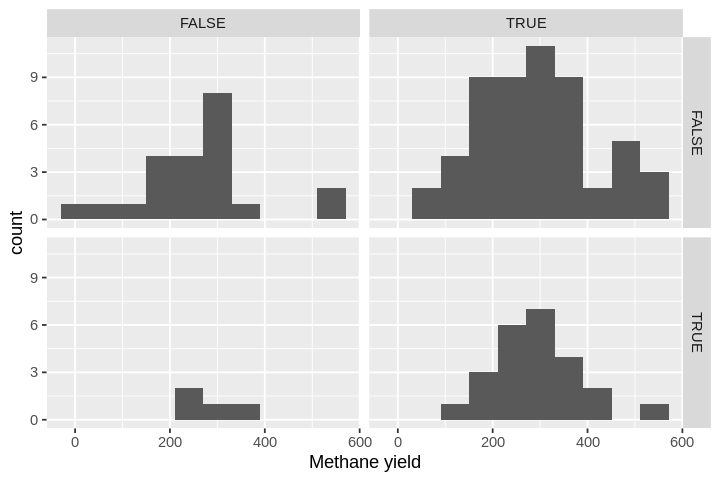

In [130]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data=df, aes(df$Methane.yield)) + geom_histogram(bins = 10) + facet_grid( cosubstrated ~ pretreated) + xlab("Methane yield")

**Influence of substrate**

In [173]:
s_df <- df %>% group_by(`Substrate`) %>% summarise(n=n()) %>% filter(n>2)
s_df

subs <- s_df$Substrate
subs

substrates_anova <- aov(Methane.yield ~ Substrate, data = filter(df, Substrate %in% subs))
summary(substrates_anova)

Substrate,n
Activated sludge,16
Cow manure,10
Food waste,6
microalgal biomass,5
Pig manure,12
Rice straw,4
Sludge,6
Wheat straw,8


[1] "Activated sludge"   "Cow manure"         "Food waste"        
[4] "microalgal biomass" "Pig manure"         "Rice straw"        
[7] "Sludge"             "Wheat straw"

            Df Sum Sq Mean Sq F value Pr(>F)  
Substrate    7 220557   31508   2,515 0,0248 *
Residuals   59 739270   12530                 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1